<h1 style="border: 2px solid cyan; text-align: center; border-radius: 8px; padding: 8px" > Digital Image </h1>


## Importing necessary libraries


In [1]:
import cv2  # to read images
import matplotlib.pyplot as plt  # to display images
import copy  # to crete a deep copy of images
import numpy as np  # for easier manipulation

## Useful functions


In [2]:
def getHeight(image):
    return len(image)


def getWidth(image):
    return len(image[0])


def getColorChannels(image):
    return len(image[0][0])


def blank(height, width):
    return [[0 for i in range(width)] for j in range(height)]


def getCount(image, value):
    m = getHeight(image)
    n = getWidth(image)
    count = 0
    for i in range(m):
        for j in range(n):
            if image[i][j] == value:
                count += 1
    return count

## 1| Loading `IMG.jpg`


In [3]:
IMG = cv2.imread("./images/IMG.jpg")  # => "IMG.jpg" as a numpy array.
img = cv2.cvtColor(
    IMG, cv2.COLOR_BGR2RGB
)  # This line converts the color space of the image from BGR to RGB.
img = img.tolist()  # Converting the NumPy array IMG to a Python list

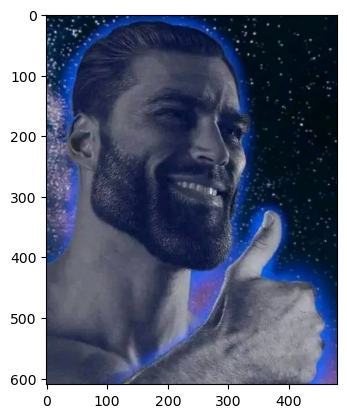

In [4]:
plt.imshow(img)
plt.show()

## 2| Determining the pixel resolution of `IMG`


In [5]:
def getPixelResolution(image):
    return (
        str(getHeight(image))
        + " X "
        + str(getWidth(image))
        + " X "
        + str(getColorChannels(image))
    )

In [6]:
getPixelResolution(image=img)

'610 X 480 X 3'

## 3| the RGB values of the pixel `IMG(10, 15)`


In [7]:
print("Red:", img[10][15][0])
print("Green:", img[10][15][1])
print("Blue:", img[10][15][2])

Red: 0
Green: 20
Blue: 41


## 4| Calculating the brightness of `IMG`


In [8]:
def getAverageBrightness(image, colorChannel):
    m = getHeight(image)
    n = getWidth(image)
    brightness = 0
    for i in range(m):
        for j in range(n):
            brightness += image[i][j][colorChannel] / (m * n)

    return brightness

In [9]:
print("Red Average Brightness: ", getAverageBrightness(image=img, colorChannel=0))
print("Green Average Brightness: ", getAverageBrightness(image=img, colorChannel=1))
print("Blue Average Brightness: ", getAverageBrightness(image=img, colorChannel=2))

Red Average Brightness:  54.17469945356442
Green Average Brightness:  63.96951502733377
Blue Average Brightness:  92.00018101092316


## 5| Calculating the average contrast of `IMG`


In [10]:
def getAverageContrast(image, colorChannel):
    m = getHeight(image)
    n = getWidth(image)
    max = image[0][0][0]
    min = image[0][0][0]
    for i in range(m):
        for j in range(n):
            if max < image[i][j][colorChannel]:
                max = image[i][j][colorChannel]
            if min > image[i][j][colorChannel]:
                min = image[i][j][colorChannel]

    return max - min

In [11]:
print("Red Average Contrast: ", getAverageContrast(image=img, colorChannel=0))
print("Green Average Contrast: ", getAverageContrast(image=img, colorChannel=1))
print("Blue Average Contrast: ", getAverageContrast(image=img, colorChannel=2))

Red Average Contrast:  247
Green Average Contrast:  250
Blue Average Contrast:  251


## 6| Showing the RGB channels of `IMG` separately


In [12]:
def getChannel(image, colorChannel):
    m = getHeight(image)
    n = getWidth(image)
    o = getColorChannels(image)
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            for k in range(o):
                if k != colorChannel:
                    result[i][j][k] = 0
    return result

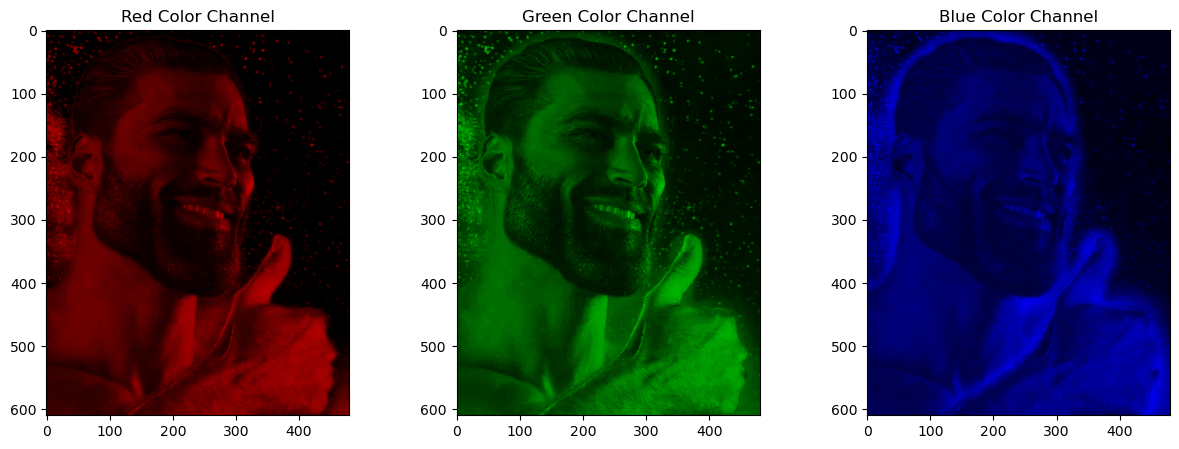

In [13]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(getChannel(image=img, colorChannel=0))
ax[0].set_title("Red Color Channel")
ax[1].imshow(getChannel(image=img, colorChannel=1))
ax[1].set_title("Green Color Channel")
ax[2].imshow(getChannel(image=img, colorChannel=2))
ax[2].set_title("Blue Color Channel")
fig.set_size_inches(15, 5)
plt.show()

## 7| Converting `IMG` to gray-level using the average method


In [14]:
def grayLevelAverageMethod(image):
    m = getHeight(image)
    n = getWidth(image)
    o = getColorChannels(image)
    grayImage = list()
    for i in range(m):
        grayImage.append([])
        for j in range(n):
            colorSum = 0
            for k in range(o):
                colorSum += image[i][j][k]
            grayImage[i].append(colorSum / 3)

    return grayImage

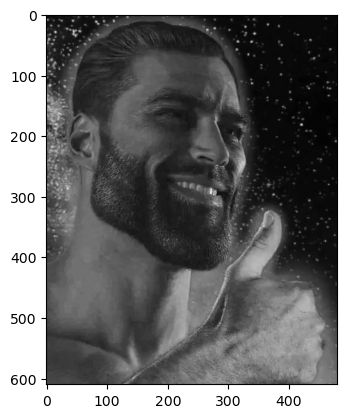

In [15]:
plt.imshow(grayLevelAverageMethod(image=img), cmap="gray")
plt.show()

## 8| Converting `IMG` to gray-level using the weighted formula


In [16]:
def loopGrayLevelWeightedFormula(image):  # using loops
    m = getHeight(image)
    n = getWidth(image)
    grayImage = list()
    for i in range(m):
        grayImage.append([])
        for j in range(n):
            colorSum = 0
            colorSum = (
                0.29 * image[i][j][0] + 0.59 * image[i][j][1] + 0.11 * image[i][j][2]
            )
            grayImage[i].append(colorSum)

    return grayImage

In [17]:
def numpyGrayLevelWeightedFormula(image):  # without loop
    npImage = np.array(image)  # Convert image to numpy array
    npGrayImage = np.dot(
        npImage[..., :3], [0.29, 0.59, 0.11]
    )  # Apply weighted formula using numpy operations
    grayImage = npGrayImage.tolist()  # Convert gray image array back to Python list

    return grayImage

In [18]:
img2 = cv2.cvtColor(IMG, cv2.COLOR_BGR2GRAY)  # using a built in function

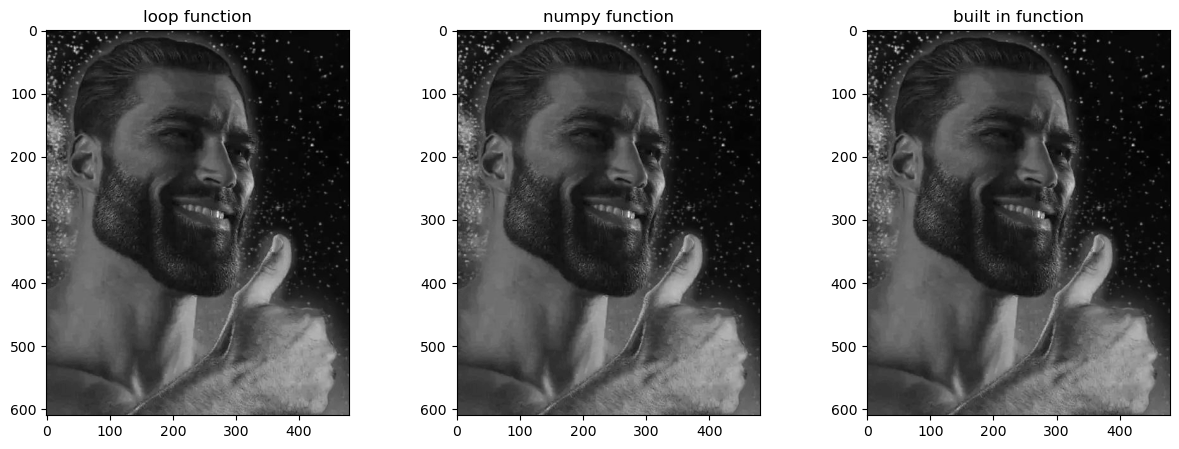

In [19]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(loopGrayLevelWeightedFormula(image=img), cmap="gray")
ax[0].set_title("loop function")
ax[1].imshow(numpyGrayLevelWeightedFormula(image=img), cmap="gray")
ax[1].set_title("numpy function")
ax[2].imshow(img2, cmap="gray")
ax[2].set_title("built in function")
fig.set_size_inches(15, 5)
plt.show()

## 9| Determine the (min , max) value of `IMG` and `IMG2`


In [20]:
def getMinMaxRGB(image, colorChannel):
    m = getHeight(image)
    n = getWidth(image)
    max = image[0][0][0]
    min = image[0][0][0]
    for i in range(m):
        for j in range(n):
            if max < image[i][j][colorChannel]:
                max = image[i][j][colorChannel]
            if min > image[i][j][colorChannel]:
                min = image[i][j][colorChannel]

    return min, max

In [21]:
def getMinMaxIntensity(image):
    m = getHeight(image)
    n = getWidth(image)
    max = image[0][0]
    min = image[0][0]
    for i in range(m):
        for j in range(n):
            if max < image[i][j]:
                max = image[i][j]
            if min > image[i][j]:
                min = image[i][j]

    return min, max

In [22]:
print("Red (min , max): ", getMinMaxRGB(image=img, colorChannel=0))
print("Green (min , max): ", getMinMaxRGB(image=img, colorChannel=1))
print("Blue (min , max): ", getMinMaxRGB(image=img, colorChannel=2))
print("Intensity image (min , max): ", getMinMaxIntensity(image=img2))

Red (min , max):  (0, 247)
Green (min , max):  (0, 250)
Blue (min , max):  (4, 255)
Intensity image (min , max):  (3, 250)


## 10| Calculating the pixel resolution of `IMG` and `IMG2`


In [23]:
def getPixelResolution(image, unit="px"):
    px = getHeight(image) * getWidth(image)
    mp = px / 1000000
    if unit == "px":
        return px
    elif unit == "mp":
        return mp

In [24]:
print("Resolution in px: ", getPixelResolution(image=img, unit="px"))
print("Resolution in mp: ", getPixelResolution(image=img, unit="mp"))

Resolution in px:  292800
Resolution in mp:  0.2928


## 11| A function to calculate the size of `IMG`


In [25]:
def getSize(image):
    return getPixelResolution(image) * getColorChannels(image) * 8

In [26]:
print("size: ", getSize(image=img), "bit")

size:  7027200 bit


## 12| Extracting a sub-image from `IMG`


In [27]:
def subImage(image, rows, cols):
    return [i[cols[0] : cols[1]] for i in image[rows[0] : rows[1]]]

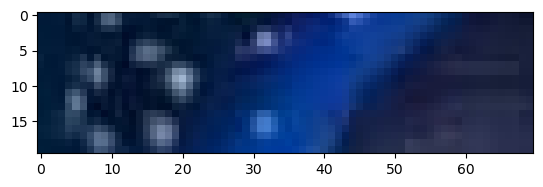

In [28]:
SUB_IMG = subImage(image=img, rows=(50, 70), cols=(20, 90))
plt.imshow(SUB_IMG)
plt.show()

## 13| Quantizing `IMG2` to `128, 64, 32` levels and displaying it


In [29]:
def quantize(image, levels):
    m = getHeight(image)
    n = getWidth(image)
    o = len(levels)
    levels.sort()
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            b = False
            for k in range(o):
                if levels[k] >= image[i][j]:
                    result[i][j] = levels[k]
                    b = True
                    break
    if b == False:
        result[i][j] = levels[-1]
    return result

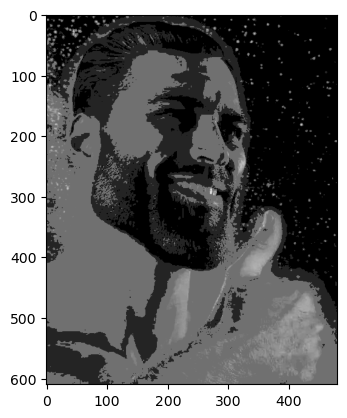

In [30]:
plt.imshow(quantize(image=img2, levels=[128, 64, 32]), cmap="gray")
plt.show()

## 14| Converting `IMG` from RGB to the different color spaces HSV, CMYK and YCbCr


In [31]:
def RGBtoCMYK(image):
    h = getHeight(image)
    w = getWidth(image)
    cmykImage = list()
    for i in range(h):
        cmykImage.append([])
        for j in range(w):
            r, g, b = image[i][j]
            r, g, b = r / 255, g / 255, b / 255

            k = 1 - max(r, g, b)
            c = (1 - r - k) / (1 - k)
            m = (1 - g - k) / (1 - k)
            y = (1 - b - k) / (1 - k)

            cmykImage[i].append(
                [round(c * 100), round(m * 100), round(y * 100), round(k * 100)]
            )

    return cmykImage

In [32]:
def RGBtoHSV(image):
    h = getHeight(image)
    w = getWidth(image)
    hsvImage = list()
    for i in range(h):
        hsvImage.append([])
        for j in range(w):
            r, g, b = image[i][j]
            r, g, b = r / 255, g / 255, b / 255

            cmax = max(r, g, b)
            cmin = min(r, g, b)
            delta = cmax - cmin

            if delta == 0:
                h = 0
            elif cmax == r:
                h = 60 * (((g - b) / delta) % 6)
            elif cmax == g:
                h = 60 * (((b - r) / delta) + 4)
            elif cmax == b:
                h = 60 * (((r - g) / delta) + 2)

            if cmax == 0:
                s = 0
            else:
                s = delta / cmax

            hsvImage[i].append([h, s, cmax])

    return hsvImage

In [33]:
def RGBtoYCbCr(image):
    h = getHeight(image)
    w = getWidth(image)
    ycbcr = list()
    for i in range(h):
        ycbcr.append([])
        for j in range(w):
            r, g, b = image[i][j]
            y = 0.299 * r + 0.587 * g + 0.114 * b
            cb = 0.564 * (b - y) + 128
            cr = 0.713 * (r - y) + 128

            ycbcr[i].append([y, cb, cr])

    return ycbcr

In [34]:
cmyk_img = RGBtoCMYK(img)
hsv_img = RGBtoHSV(img)
ycbcr_img = RGBtoYCbCr(img)

## 15| Binarizing `IMG2` according to `10, 50, 125, 25` as threshold


In [35]:
def binarize(image, threshold):
    m = getHeight(image)
    n = getWidth(image)
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            if result[i][j] > threshold:
                result[i][j] = 255
            else:
                result[i][j] = 0
    return result

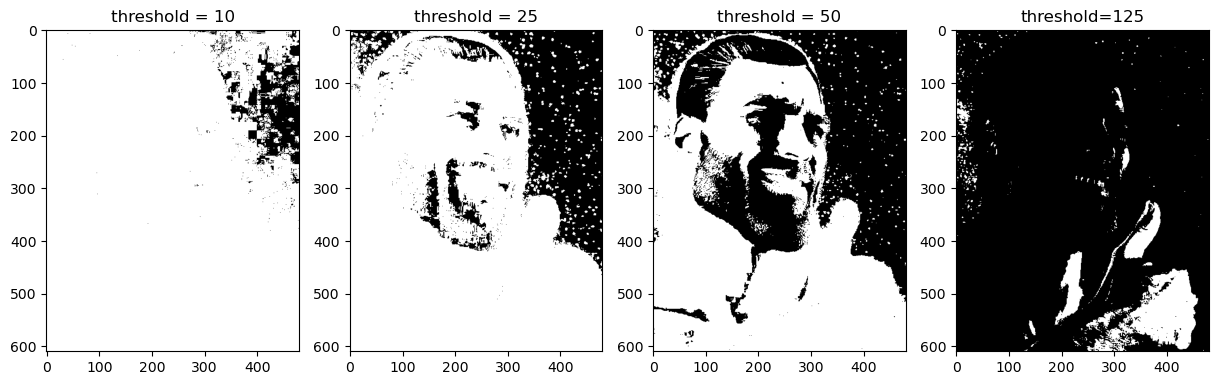

In [36]:
fig, ax = plt.subplots(1, 4)
ax[0].imshow(binarize(image=img2, threshold=10), cmap="gray")
ax[0].set_title("threshold = 10")
ax[1].imshow(binarize(image=img2, threshold=25), cmap="gray")
ax[1].set_title("threshold = 25")
ax[2].imshow(binarize(image=img2, threshold=50), cmap="gray")
ax[2].set_title("threshold = 50")
ax[3].imshow(binarize(image=img2, threshold=125), cmap="gray")
ax[3].set_title("threshold=125")
fig.set_size_inches(15, 5)
plt.show()

## 16| Calculating the complementary image of `IMG2` and its binarized version


In [37]:
def compliment(image):
    m = getHeight(image)
    n = getWidth(image)
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            result[i][j] = 255 - result[i][j]
    return result

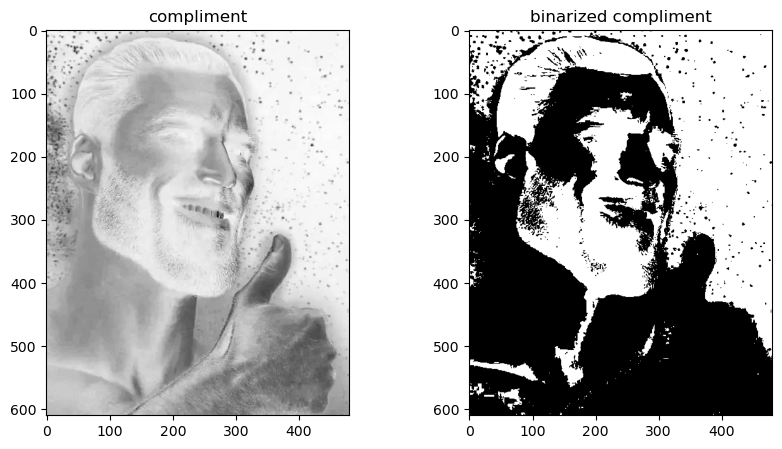

In [38]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(compliment(image=img2), cmap="gray")
ax[0].set_title("compliment")
ax[1].imshow(binarize(image=compliment(image=img2), threshold=200), cmap="gray")
ax[1].set_title("binarized compliment")
fig.set_size_inches(10, 5)
plt.show()

## 17| Adding (and subtracting) the following values `10, 30,60, 200` from `IMG2`


In [39]:
def addValue(image, value):
    return [i + value for i in image]

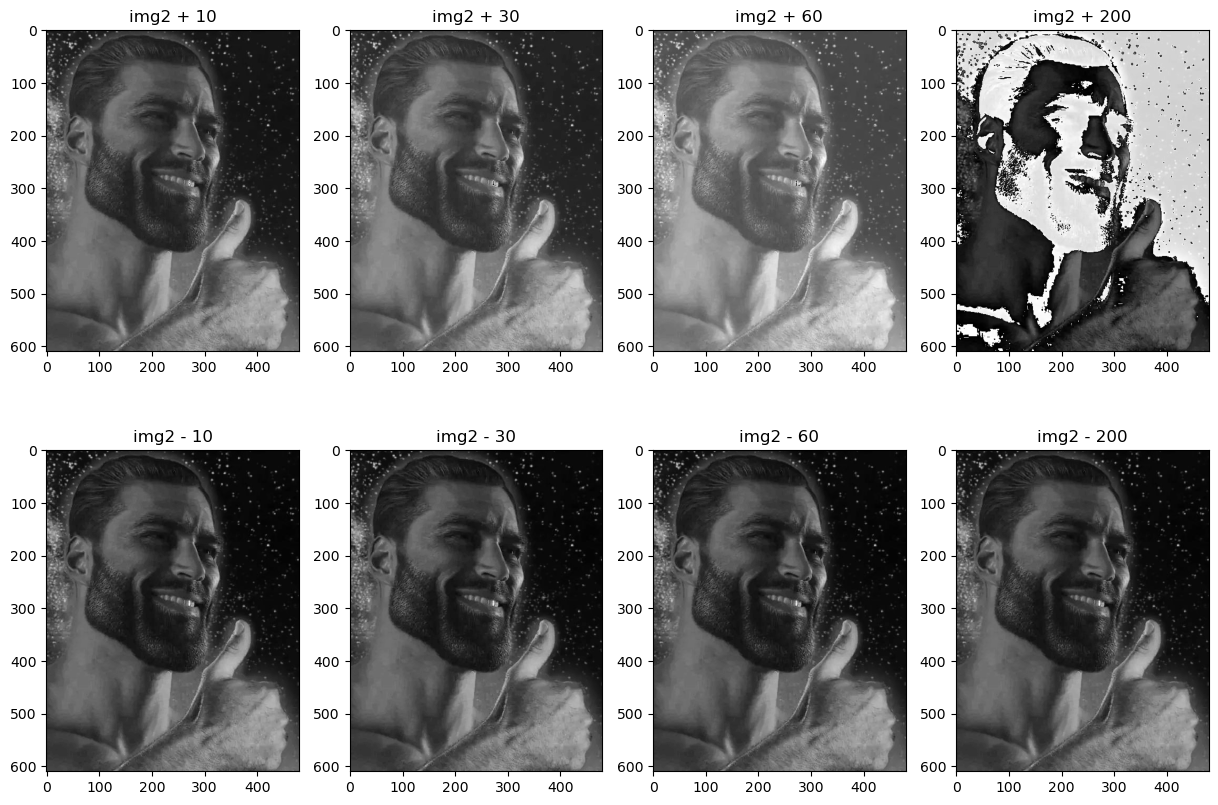

In [40]:
fig, ax = plt.subplots(2, 4)
ax[0, 0].imshow(addValue(image=img2, value=10), cmap="gray")
ax[0, 0].set_title("img2 + 10")
ax[0, 1].imshow(addValue(image=img2, value=30), cmap="gray")
ax[0, 1].set_title("img2 + 30")
ax[0, 2].imshow(addValue(image=img2, value=60), cmap="gray")
ax[0, 2].set_title("img2 + 60")
ax[0, 3].imshow(addValue(image=img2, value=200), cmap="gray")
ax[0, 3].set_title("img2 + 200")
ax[1, 0].imshow(addValue(image=img2, value=-10), cmap="gray")
ax[1, 0].set_title("img2 - 10")
ax[1, 1].imshow(addValue(image=img2, value=-30), cmap="gray")
ax[1, 1].set_title("img2 - 30")
ax[1, 2].imshow(addValue(image=img2, value=-60), cmap="gray")
ax[1, 2].set_title("img2 - 60")
ax[1, 3].imshow(addValue(image=img2, value=-200), cmap="gray")
ax[1, 3].set_title("img2 - 200")
fig.set_size_inches(15, 10)
plt.show()

## 18| Increasing / decreasing image brightness by multiplying `IMG2` by `1.7` and `0.6`, respectively


In [41]:
def multiplyByValue(image, value):
    return [i * value for i in image]

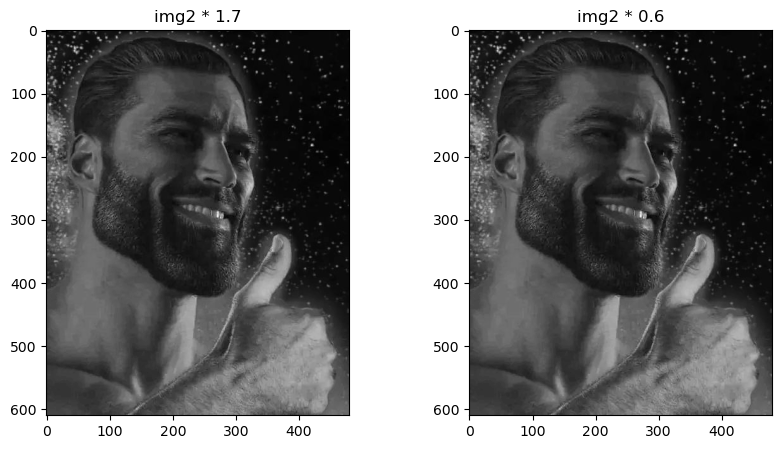

In [42]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(multiplyByValue(image=img2, value=1.7), cmap="gray")
ax[0].set_title("img2 * 1.7")
ax[1].imshow(multiplyByValue(image=img2, value=0.6), cmap="gray")
ax[1].set_title("img2 * 0.6")
fig.set_size_inches(10, 5)
plt.show()

## 19| Devising the image by `2` and `0.5`, respectively


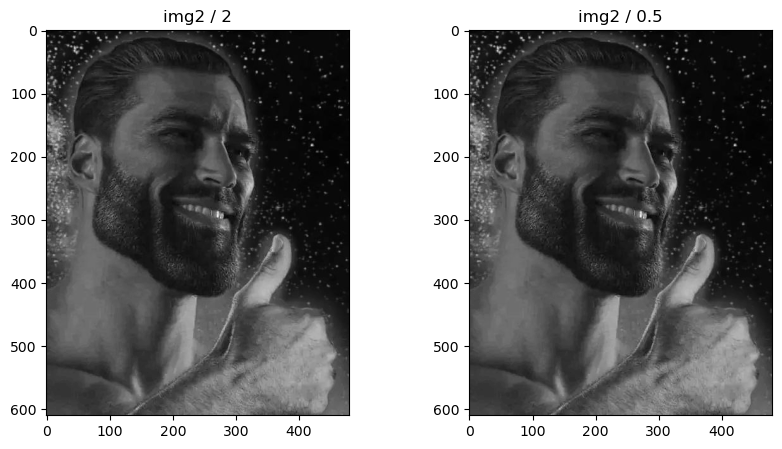

In [43]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(multiplyByValue(image=img2, value=1/2), cmap="gray")
ax[0].set_title("img2 / 2")
ax[1].imshow(multiplyByValue(image=img2, value=1/0.5), cmap="gray")
ax[1].set_title("img2 / 0.5")
fig.set_size_inches(10, 5)
plt.show()

## 20| Loading `IMG3`


In [44]:
IMG3 = cv2.imread("./images/IMG3.jpg")
img3 = cv2.cvtColor(
    IMG3, cv2.COLOR_BGR2RGB
)  # This line converts the color space of the image from BGR to RGB.
img3 = img3.tolist()  # Converting the NumPy array IMG to a Python list

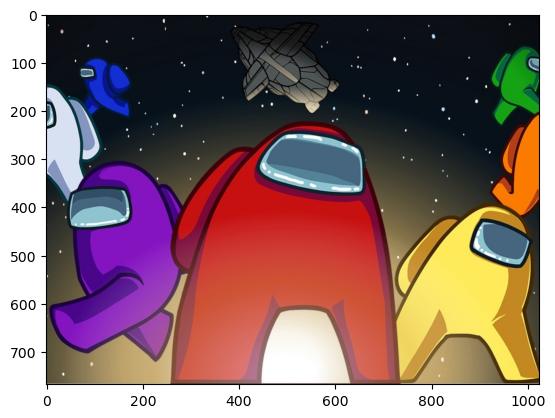

In [45]:
plt.imshow(img3)
plt.show()

## 21| Calculating the min / max of `(IMG2, IMG3)`


In [46]:
def minMax(image1, image2):
    m = min(getHeight(image1), getHeight(image2))
    n = min(getWidth(image1), getWidth(image2))
    resultMin = blank(m, n)
    resultMax = blank(m, n)
    
    for i in range(m):
        for j in range(n):
            if image1[i][j] <= image2[i][j]:
                resultMin[i][j] = image1[i][j]
                resultMax[i][j] = image2[i][j]
            else:
                resultMin[i][j] = image2[i][j]
                resultMax[i][j] = image1[i][j]
    
    return resultMin, resultMax

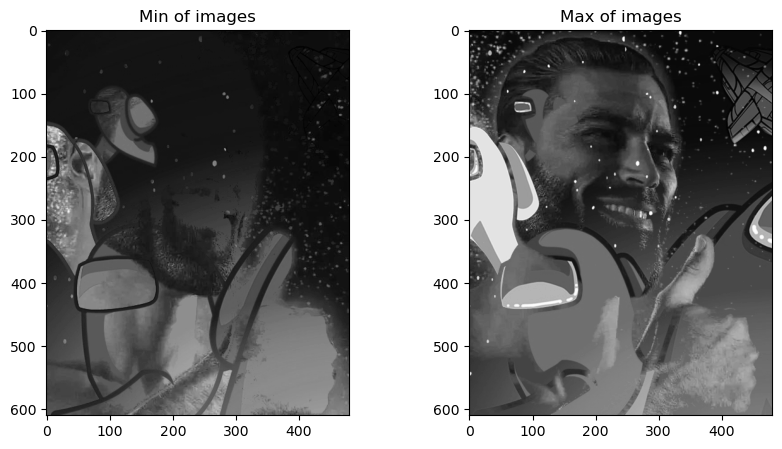

In [47]:
fig, ax = plt.subplots(1, 2)
min_image, max_image = minMax(image1=img2, image2=grayLevelAverageMethod(img3))
ax[0].imshow(min_image, cmap="gray")
ax[0].set_title("Min of images")
ax[1].imshow(max_image, cmap="gray")
ax[1].set_title("Max of images")
fig.set_size_inches(10, 5)
plt.show()

## 22| Combining `IMG2` and `IMG3` linearly using `(0.1, 0.9), (0.5, 0.5),(0.9, 0.1)`


In [48]:
def linearCombination(image1 ,image2 ,a ,b ):
    h = min(getHeight(image1), getHeight(image2))
    w = min(getWidth(image1), getWidth(image2)) 
    result = blank(h, w)
    for i in range(h):
        for j in range(w):
            result[i][j] = a * image1[i][j] + b * image2[i][j]

    return result

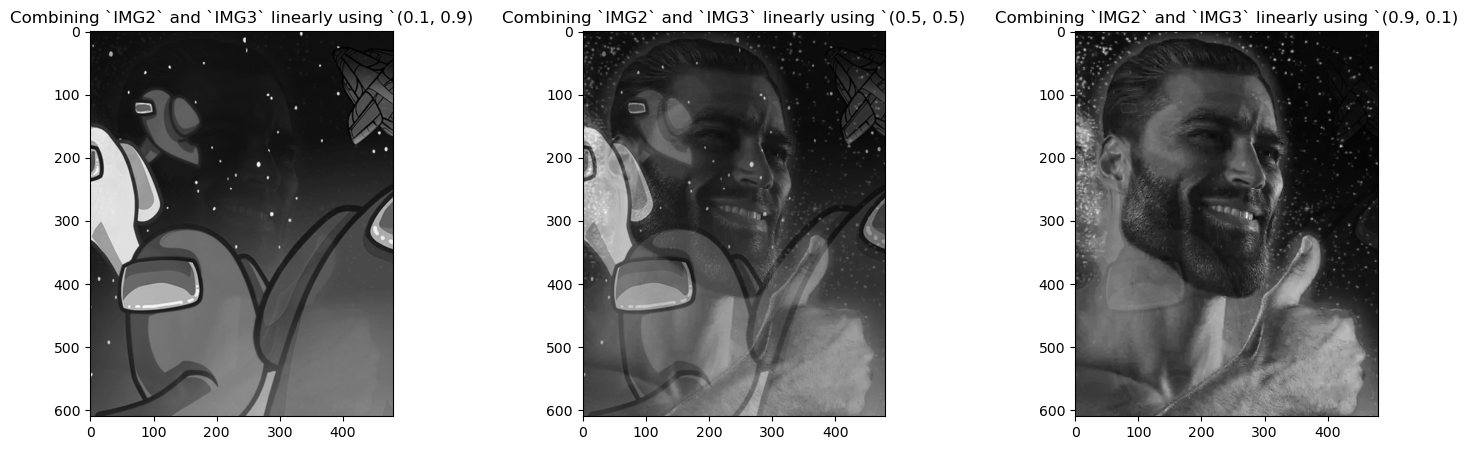

In [49]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(linearCombination(image1=img2, image2=grayLevelAverageMethod(img3) ,a=0.1 ,b=0.9), cmap="gray")
ax[0].set_title("Combining `IMG2` and `IMG3` linearly using `(0.1, 0.9)")
ax[1].imshow(linearCombination(image1=img2, image2=grayLevelAverageMethod(img3) ,a=0.5 ,b=0.5), cmap="gray")
ax[1].set_title("Combining `IMG2` and `IMG3` linearly using `(0.5, 0.5)")
ax[2].imshow(linearCombination(image1=img2, image2=grayLevelAverageMethod(img3) ,a=0.9 ,b=0.1), cmap="gray")
ax[2].set_title("Combining `IMG2` and `IMG3` linearly using `(0.9, 0.1)")
fig.set_size_inches(18, 5)
plt.show()

## 23| Creating two images containing squares


In [50]:
def createSquare(image,x,y):
  result = copy.deepcopy(image)
  for i in range(x[0], x[1]):
    for j in range(y[0], y[1]):
      result[i][j] = 1
  return result

In [51]:
square1 = createSquare(
    image=blank(500,500), x=(50, 300), y=(50, 300) # x=(50, 300), y=(50, 300) 
)
square2 = createSquare(
    image=blank(500,500), x=(200, 450), y=(200, 450) # x=(200, 450), y=(200, 450)
)

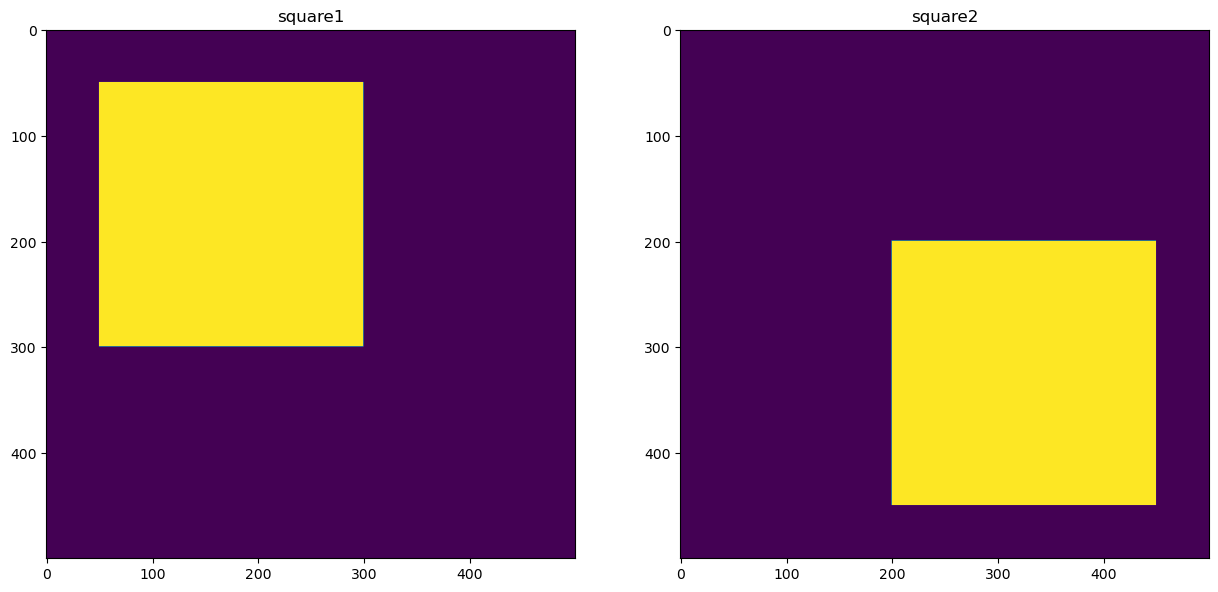

In [52]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(square1)
ax[0].set_title("square1")
ax[1].imshow(square2)
ax[1].set_title("square2")
fig.set_size_inches(15, 10)
plt.show()

## 24| Performing the following logical operations: AND, OR, XOR, XNOR on the two image square


In [53]:
def imageAND(image1, image2):
    result = copy.deepcopy(image1)
    m = getHeight(image1)
    n = getWidth(image1)
    for i in range(m):
        for j in range(n):
            result[i][j] = image1[i][j] and image2[i][j]
    return result


def imageOR(image1, image2):
    result = copy.deepcopy(image1)
    m = getHeight(image1)
    n = getWidth(image1)
    for i in range(m):
        for j in range(n):
            result[i][j] = image1[i][j] or image2[i][j]
    return result


def imageXOR(image1, image2):
    result = copy.deepcopy(image1)
    m = getHeight(image1)
    n = getWidth(image1)
    for i in range(m):
        for j in range(n):
            result[i][j] = image1[i][j] ^ image2[i][j]
    return result


def imageXNOR(image1, image2):
    result = copy.deepcopy(image1)
    m = getHeight(image1)
    n = getWidth(image1)
    for i in range(m):
        for j in range(n):
            result[i][j] = ~(image1[i][j] ^ image2[i][j])
    return result

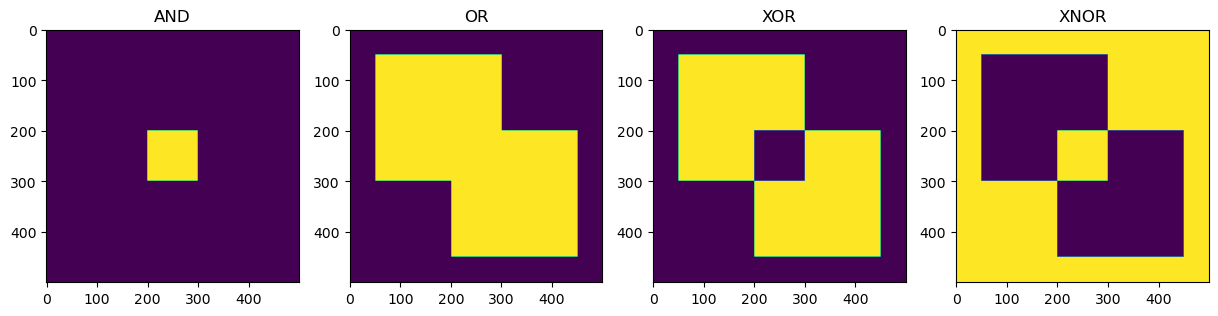

In [54]:
fig, ax = plt.subplots(1, 4)
ax[0].imshow(imageAND(image1=square1, image2=square2))
ax[0].set_title("AND")
ax[1].imshow(imageOR(image1=square1, image2=square2))
ax[1].set_title("OR")
ax[2].imshow(imageXOR(image1=square1, image2=square2))
ax[2].set_title("XOR")
ax[3].imshow(imageXNOR(image1=square1, image2=square2))
ax[3].set_title("XNOR")
fig.set_size_inches(15, 10)

## 25| Generating two other binary images containing arbitrary shapes


In [55]:
def createArbitrary(image):
    m = getHeight(image)
    n = getWidth(image)
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            result[i][j] = round(np.random.rand())
    return result

In [56]:
arbitrary1 = createArbitrary(image=blank(50, 50))
arbitrary2 = createArbitrary(image=blank(50, 50))

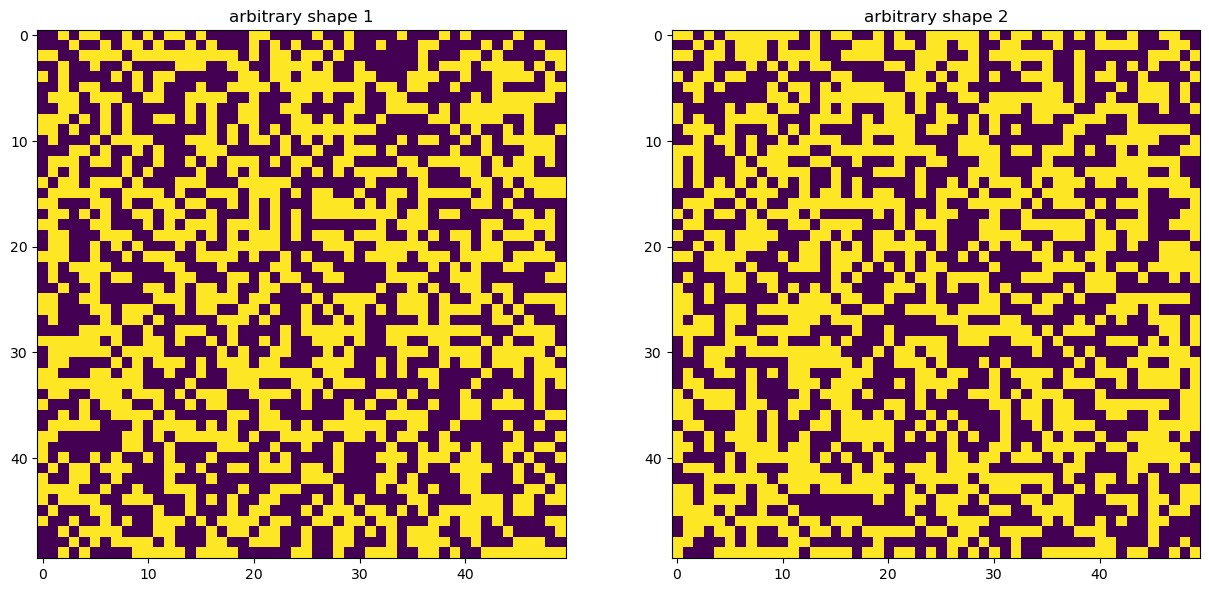

In [57]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(arbitrary1)
ax[0].set_title("arbitrary shape 1")
ax[1].imshow(arbitrary2)
ax[1].set_title("arbitrary shape 2")
fig.set_size_inches(15, 10)
plt.show()

## 26| Performing the following operations: erosion, dilation, opening and closing on the image using a 3\*3 square binary image as a structural element


In [58]:
def fitHit(structural_element, image_part):
    m = getHeight(structural_element)
    n = getWidth(structural_element)
    fit = True
    hit = False
    for i in range(m):
        for j in range(n):
            if (structural_element[i][j] == 1) and (image_part[i][j] == 0):
                fit = False
            if (structural_element[i][j] == 1) and (image_part[i][j] == 1):
                hit = True
    return fit, hit

In [59]:
def erosionDilation(image, structural_element, operation):
    m = getHeight(image)
    n = getWidth(image)
    sm = getHeight(structural_element)
    sn = getWidth(structural_element)
    result = blank(m, n)
    for i in range(m - sm):
        for j in range(n - sn):
            image_part = [k[j : j + sn] for k in image[i : i + sm]]
            if operation == 0:
                if fitHit(structural_element, image_part)[0]:
                    result[i + np.ceil(sm / 2).astype(int)][
                        j + np.ceil(sn / 2).astype(int)
                    ] = 1
            elif operation == 1:
                if fitHit(structural_element, image_part)[1]:
                    result[i + np.ceil(sm / 2).astype(int)][
                        j + np.ceil(sn / 2).astype(int)
                    ] = 1
    return result


def openingClosing(image, structural_element, operation):
    if operation == 0:
        return erosionDilation(
            erosionDilation(image, structural_element, 0), structural_element, 1
        )
    elif operation == 1:
        return erosionDilation(
            erosionDilation(image, structural_element, 1), structural_element, 0
        )

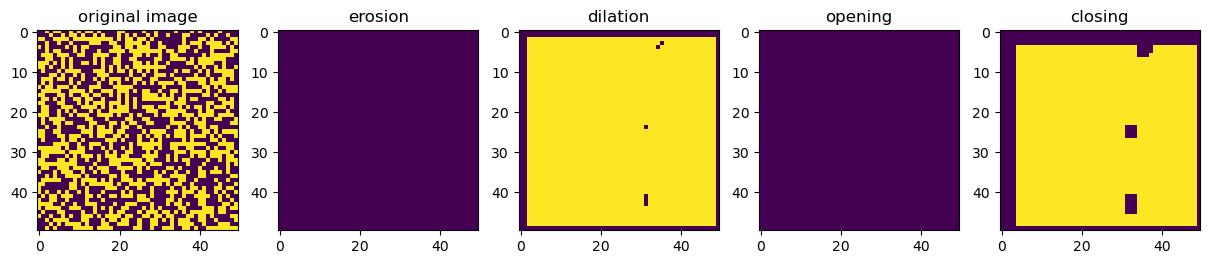

In [60]:
structural_element = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
fig, ax = plt.subplots(1, 5)
ax[0].imshow(arbitrary1)
ax[0].set_title("original image")
ax[1].imshow(
    erosionDilation(
        image=arbitrary1, structural_element=structural_element, operation=0
    )
)
ax[1].set_title("erosion")
ax[2].imshow(
    erosionDilation(
        image=arbitrary1, structural_element=structural_element, operation=1
    )
)
ax[2].set_title("dilation")
ax[3].imshow(
    openingClosing(image=arbitrary1, structural_element=structural_element, operation=0)
)
ax[3].set_title("opening")
ax[4].imshow(
    openingClosing(image=arbitrary1, structural_element=structural_element, operation=1)
)
ax[4].set_title("closing")
fig.set_size_inches(15, 10)
plt.show()

## 27| Generating the gray-level histogram of `IMG2`


In [61]:
def getGrayLevelHistogram(image):
    return [getCount(image, i) for i in range(256)]

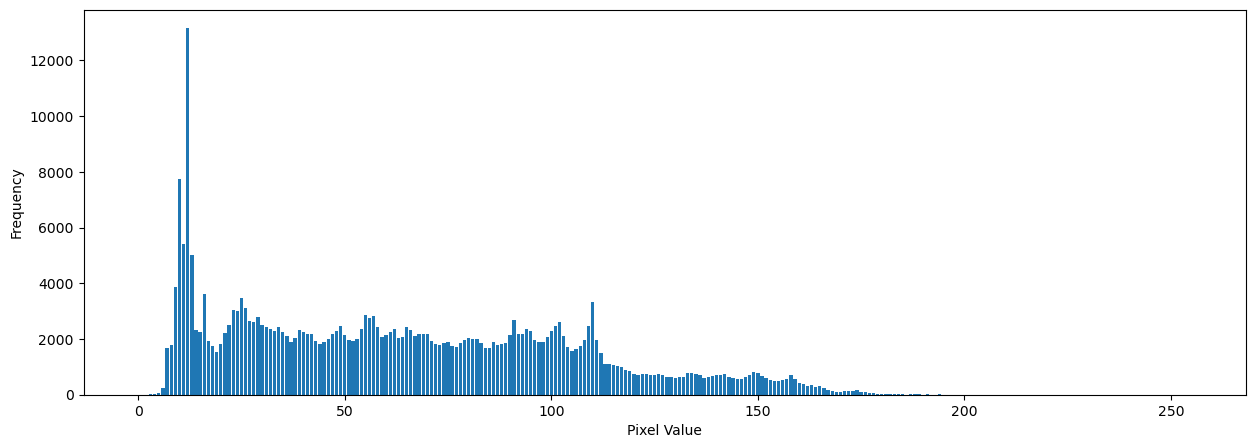

In [62]:
plt.figure(figsize=(15,5))
plt.bar(range(256), getGrayLevelHistogram(img2))
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## 28| Adding 70 to all the image pixels, and comparing the histogram before and after


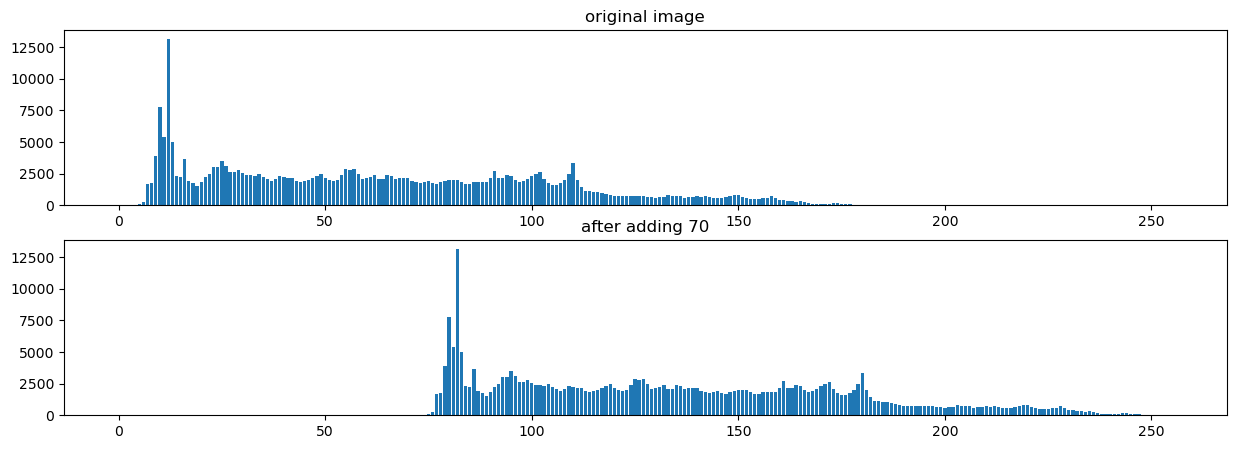

In [63]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(15, 5)
ax[0].bar(range(256), getGrayLevelHistogram(img2))
ax[0].set_title("original image")
ax[1].bar(range(256), getGrayLevelHistogram(addValue(img2, 70)))
ax[1].set_title("after adding 70")
plt.show()

## 29| Loading a low contrast image `IMG4`


In [64]:
IMG4 = cv2.imread("./images/IMG4.png")
img4 = cv2.cvtColor(
    IMG4, cv2.COLOR_BGR2RGB
)  # This line converts the color space of the image from BGR to RGB.
img4 = img4.tolist()  # Converting the NumPy array IMG to a Python list

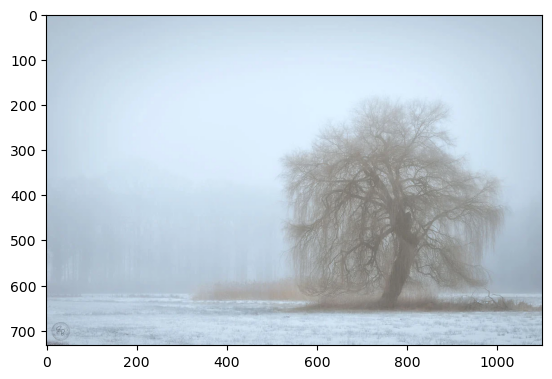

In [65]:
plt.imshow(img4)
plt.show()

In [66]:
gray_img4 = grayLevelAverageMethod(img4)

## 30| Applying the histogram stretching (the two formulas of course), and showing the histogram before and after each process


In [67]:
def histogramStretching(image, r, formula):
    m = getHeight(image)
    n = getWidth(image)
    imin, imax = getMinMaxIntensity(image)
    rmin, rmax = r
    result = copy.deepcopy(image)
    if formula == 0:
        a = (rmax - rmin) / (imax - imin)
        b = rmax - a * imax
        for i in range(m):
            for j in range(n):
                result[i][j] = round(a * result[i][j] + b)
    elif formula == 1:
        for i in range(m):
            for j in range(n):
                result[i][j] = round(rmax * (result[i][j] - imin) / (imax - imin))
    return result

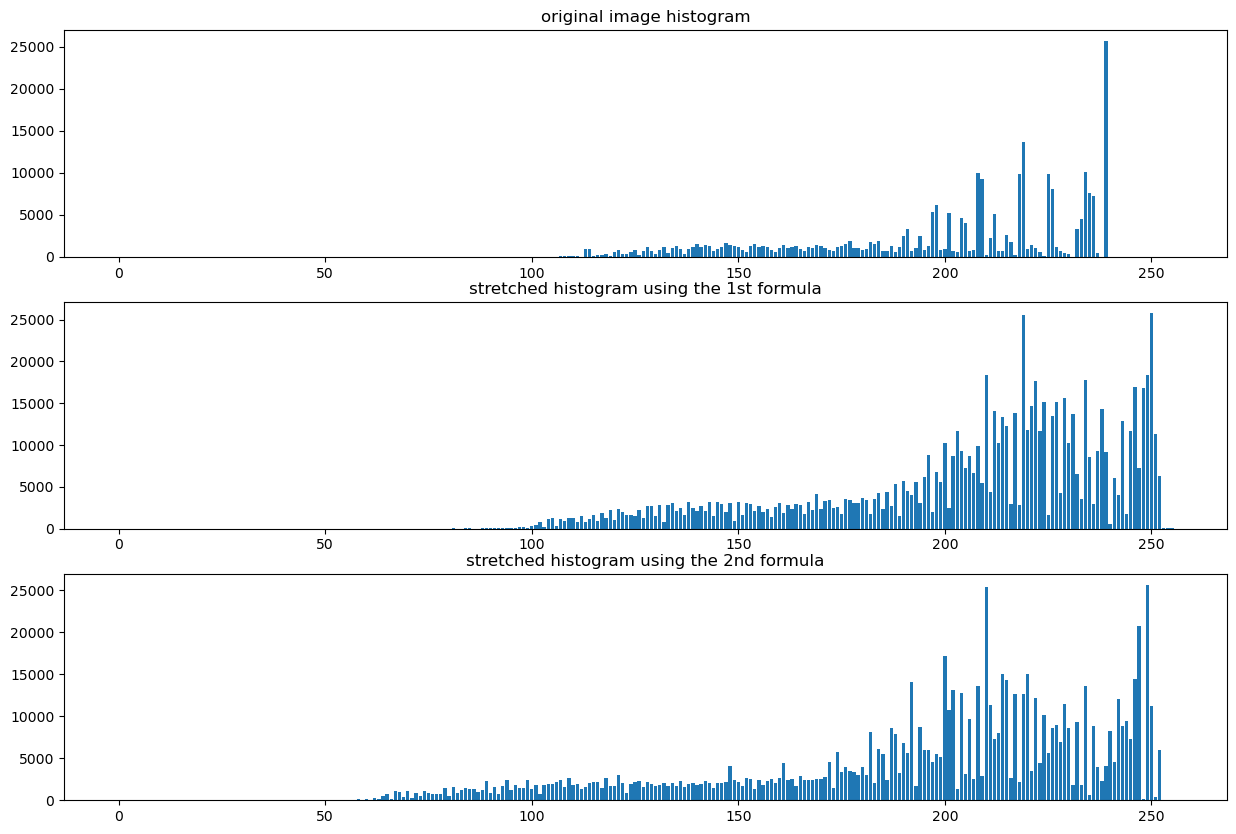

In [68]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(15, 10)
ax[0].bar(range(256), getGrayLevelHistogram(gray_img4))
ax[0].set_title("original image histogram")
ax[1].bar(range(256), getGrayLevelHistogram(histogramStretching(gray_img4, (50, 255), 0)))
ax[1].set_title("stretched histogram using the 1st formula")
ax[2].bar(range(256), getGrayLevelHistogram(histogramStretching(gray_img4, (50, 255), 1)))
ax[2].set_title("stretched histogram using the 2nd formula")
plt.show()

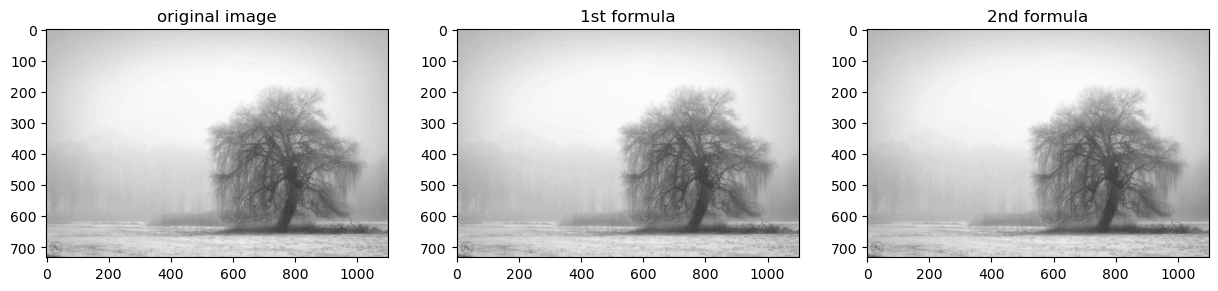

In [78]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
ax[0].imshow(gray_img4, cmap="gray")
ax[0].set_title("original image")
ax[1].imshow(histogramStretching(gray_img4, (50, 255), 0), cmap="gray")
ax[1].set_title("1st formula")
ax[2].imshow(histogramStretching(gray_img4, (50, 255), 1), cmap="gray")
ax[2].set_title("2nd formula")
plt.show()

## 31| Applying Gamma correction on `IMG2`, where the values of Gamma are: `1.5, 4.2, 2.1`


In [109]:
def gammaCorrection(image, ld):
    m, n = getHeight(image), getWidth(image)
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            result[i][j] = result[i][j] ** ld

    return result

C:\Users\Djezzar Moncef\AppData\Local\Temp\ipykernel_12384\3171150430.py:6: RuntimeWarning: invalid value encountered in cast
  result[i][j] = result[i][j] ** ld


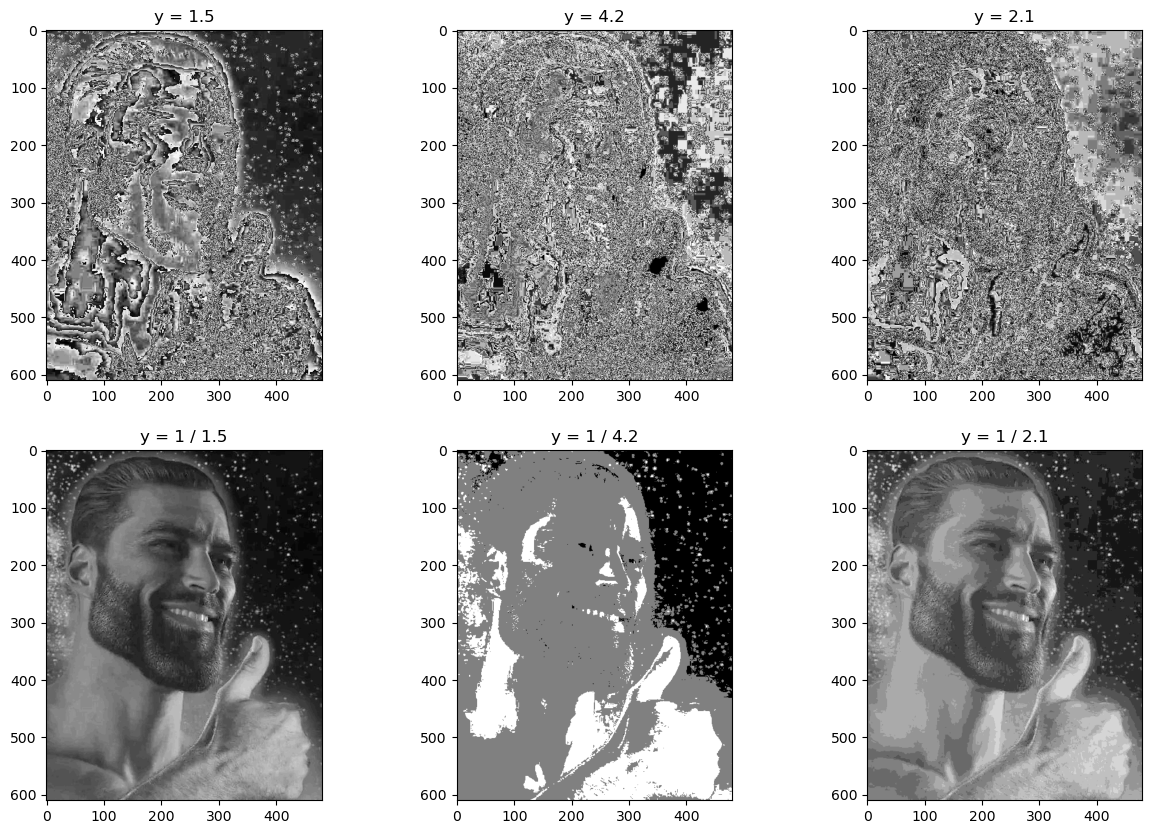

In [108]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
ax[0, 0].imshow(gammaCorrection(img2, 1.5), cmap="gray")
ax[0, 0].set_title("y = 1.5")
ax[0, 1].imshow(gammaCorrection(img2, 4.2), cmap="gray")
ax[0, 1].set_title("y = 4.2")
ax[0, 2].imshow(gammaCorrection(img2, 2.1), cmap="gray")
ax[0, 2].set_title("y = 2.1")
ax[1, 0].imshow(gammaCorrection(img2, 1 / 1.5), cmap="gray")
ax[1, 0].set_title("y = 1 / 1.5")
ax[1, 1].imshow(gammaCorrection(img2, 1 / 4.2), cmap="gray")
ax[1, 1].set_title("y = 1 / 4.2")
ax[1, 2].imshow(gammaCorrection(img2, 1 / 2.1), cmap="gray")
ax[1, 2].set_title("y = 1 / 2.1")
plt.show()

## 32| Applying the algorithm of histogram equalization on `IMG4`, and showing the histogram before and after


In [161]:
def CDF(pmf):
    cdf = [0] * len(pmf)
    cdf[0] = pmf[0]
    for i in range(1, len(pmf)):
        cdf[i] = cdf[i - 1] + pmf[i]
    return cdf


def histogramEqualization(image, lmax):
    hc = getGrayLevelHistogram(image)
    pmf = [i / sum(hc) for i in hc]
    cdf = CDF(pmf)
    cdfLmax = [i * lmax for i in cdf]
    m, n = getHeight(image), getWidth(image)
    result = copy.deepcopy(image)
    for i in range(m):
        for j in range(n):
            result[i][j] = round(cdfLmax[int(image[i][j])])
    return result

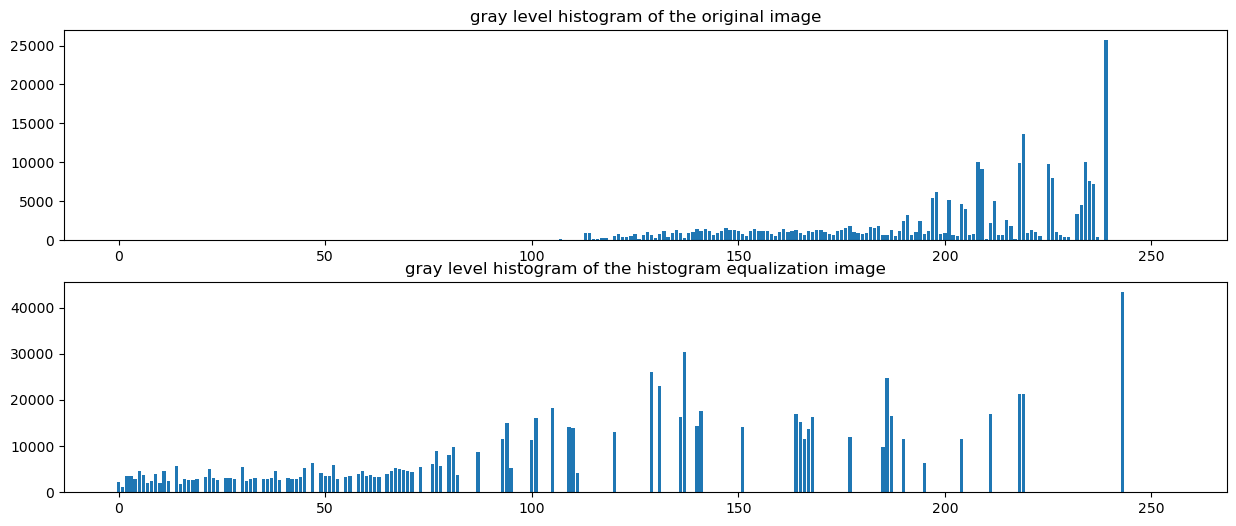

In [162]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(15, 6)
ax[0].bar(range(256), getGrayLevelHistogram(gray_img4))
ax[0].set_title("gray level histogram of the original image")
ax[1].bar(range(256), getGrayLevelHistogram(histogramEqualization(gray_img4,getMinMaxIntensity(gray_img4)[1])))
ax[1].set_title("gray level histogram of the histogram equalization image")
plt.show()

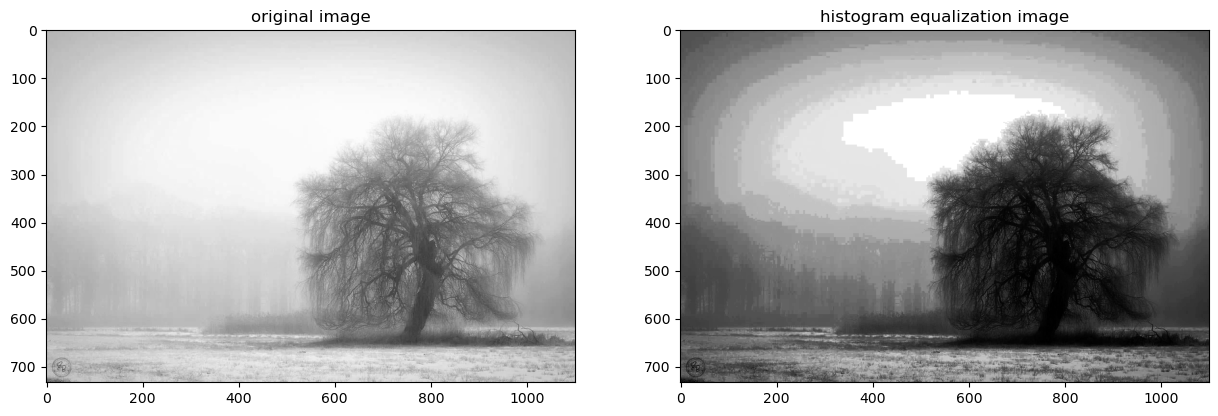

In [163]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax[0].imshow(gray_img4, cmap="gray")
ax[0].set_title("original image")
ax[1].imshow(histogramEqualization(gray_img4, getMinMaxIntensity(gray_img4)[1]), cmap="gray")
ax[1].set_title("histogram equalization image")
plt.show()

## 33| Loading `IMG5`


In [ ]:
IMG5 = cv2.imread("./images/IMG5.jpg")
img5 = cv2.cvtColor(
    IMG5, cv2.COLOR_BGR2RGB
)  # This line converts the color space of the image from BGR to RGB.
img5 = img5.tolist()  # Converting the NumPy array IMG to a Python list

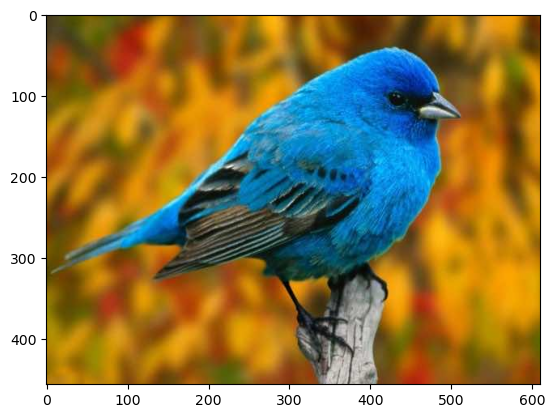

In [ ]:
plt.imshow(img5)

## 34| Adding a salt, pepper, salt-pepper, Gaussian noise to `IMG5`


In [ ]:
def salt(image, density):
    m, n = getHeight(image), getWidth(image)
    result = copy.deepcopy(image)
    for i in range(density):
        result[round(np.random.randint(m))][round(np.random.randint(n))] = [
            255,
            255,
            255,
        ]
    return result


def pepper(image, density):
    m, n = getHeight(image), getWidth(image)
    result = copy.deepcopy(image)
    for i in range(density):
        result[round(np.random.randint(m))][round(np.random.randint(n))] = [0, 0, 0]
    return result


def saltPepper(image, density):
    return pepper(salt(image, density), density)


def gaussianNoise(image, density):
    m, n = getHeight(image), getWidth(image)
    result = copy.deepcopy(image)
    for index in range(density):
        i, j = round(np.random.randint(m)), round(np.random.randint(n))
        random = round(np.random.normal()*255)
        result[i][j][0] += random
        result[i][j][1] += random
        result[i][j][2] += random
    return result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


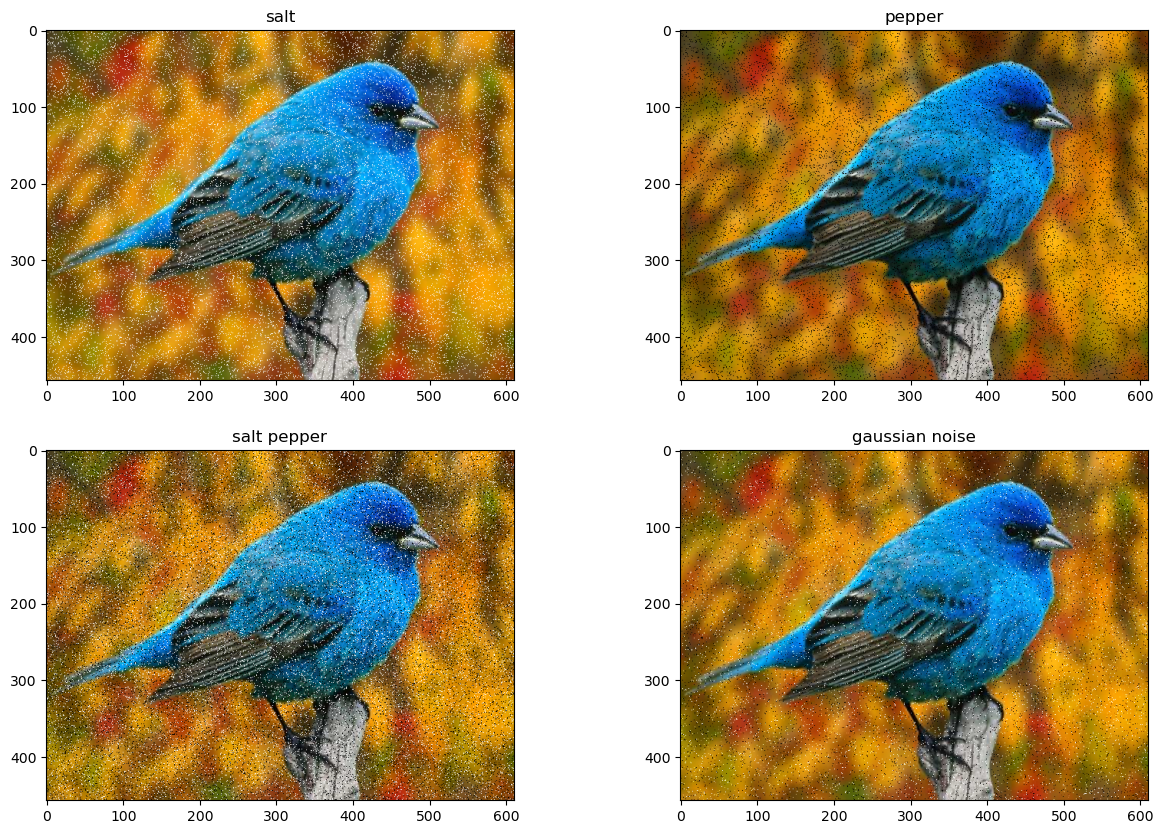

In [ ]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
ax[0, 0].imshow(salt(img5, 20000))
ax[0, 0].set_title("salt")
ax[0, 1].imshow(pepper(img5, 20000))
ax[0, 1].set_title("pepper")
ax[1, 0].imshow(saltPepper(img5, 20000))
ax[1, 0].set_title("salt pepper")
ax[1, 1].imshow(gaussianNoise(img5, 20000))
ax[1, 1].set_title("gaussian noise")
plt.show()

## 35| Applying mean and Gaussian filters on the noisy versions of `IMG5`


In [ ]:
# (vary the parameters)

## 36| Applying the median filter with a neighborhood of `3,5` and `7`, respectively.


## 37| Applying Sobel operator on `IMG5`, and showing the horizontal, vertical and the final edge


## 38| Showing the gradient magnitude image of `IMG5`, and threshold it using `10, 50, 120, 190` and showing the resulting images


## 39| Showing the edge image in which the pixels kept only with the maximum of gradient in the gradient direction


## 40| Detecting the edges in `IMG5` using Laplacian of Gaussian


## 41| Detect the edges in IMG5 using canny algorithm
